# Cab Fare Prediction
###  Problem Statement-
You are a cab rental start-up company. You have successfully run the pilot project and
now want to launch your cab service across the country. You have collected the
historical data from your pilot project and now have a requirement to apply analytics for
fare prediction. You need to design a system that predicts the fare amount for a cab ride
in the city.

In [1]:
#Importing required libraries
import os #getting access to input files
import pandas as pd # Importing pandas for performing EDA
import numpy as np  # Importing numpy for Linear Algebric operations
import matplotlib.pyplot as plt # Importing for Data Visualization
import seaborn as sns # Importing for Data Visualization
from collections import Counter 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

In [2]:
#### set working directory###
os.chdir("C:/Users/Poo/Documents/edWisor/online project no 01")
os.getcwd()

'C:\\Users\\Poo\\Documents\\edWisor\\online project no 01'

In [4]:
########### load CSV file #########
cab_traindf = pd.read_csv("train_cab.csv")
cab_testdf = pd.read_csv("test_01.csv")

In [5]:
cab_traindf.head() #checking first five rows of the training dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
cab_testdf.head() #checking first five rows of the test dataset

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
print("shape of training data is: ",cab_traindf.shape) #checking the number of rows and columns in training data
print("shape of test data is: ",cab_testdf.shape) #checking the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [8]:
cab_traindf.dtypes #checking the data-types in training dataset

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [9]:
cab_testdf.dtypes #checking the data-types in test dataset

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Here we can see pickup datetime and fare amount is of object type. So we need to change the data type of both

##### 1. Fare Amount

In [10]:
#Convert fare_amount from object to numeric
cab_traindf["fare_amount"] = pd.to_numeric(cab_traindf["fare_amount"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.


In [11]:
###check datatype and shape now###
print("cab_traindf datatype:",cab_traindf.dtypes)
print("cab_traindf shape   :", cab_traindf.shape)

cab_traindf datatype: fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object
cab_traindf shape   : (16067, 7)


##### 2.Datetime

In [12]:
############################# Convert object to datetime #####################
from datetime import datetime
import calendar
cab_traindf.pickup_datetime = pd.to_datetime(cab_traindf.pickup_datetime, errors='coerce')

In [13]:
######################## Split Data time ##########################
cab_traindf['Year']= cab_traindf['pickup_datetime'].dt.year
cab_traindf['Month']=cab_traindf['pickup_datetime'].dt.month
cab_traindf['Date']=cab_traindf['pickup_datetime'].dt.day
cab_traindf['Hour']=cab_traindf['pickup_datetime'].dt.hour
cab_traindf['Minute']=cab_traindf['pickup_datetime'].dt.minute
cab_traindf['Second']=cab_traindf['pickup_datetime'].dt.second
cab_traindf['weekday_name']=cab_traindf['pickup_datetime'].dt.weekday_name

cab_traindf.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Hour,Minute,Second,weekday_name
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,17.0,26.0,21.0,Monday
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,52.0,16.0,Tuesday
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,35.0,0.0,Thursday
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,30.0,42.0,Saturday
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,51.0,0.0,Tuesday


In [14]:
cab_traindf.dtypes ##check the data tpye##

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                  float64
Year                             float64
Month                            float64
Date                             float64
Hour                             float64
Minute                           float64
Second                           float64
weekday_name                      object
dtype: object

In [15]:
cab_testdf["pickup_datetime"] = pd.to_datetime(cab_testdf["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [16]:
### we will saperate the Pickup_datetime column into separate field like year, month, day of the week, etc

cab_testdf['year'] = cab_testdf['pickup_datetime'].dt.year
cab_testdf['Month'] = cab_testdf['pickup_datetime'].dt.month
cab_testdf['Date'] = cab_testdf['pickup_datetime'].dt.day
cab_testdf['Day'] = cab_testdf['pickup_datetime'].dt.dayofweek
cab_testdf['Hour'] = cab_testdf['pickup_datetime'].dt.hour
cab_testdf['Minute'] = cab_testdf['pickup_datetime'].dt.minute

In [17]:
cab_testdf.dtypes #Re-checking test datatypes after conversion

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

### Observations :
-Fare amount shout not be a negative value

-Passenger count should not exceed 6(even if we consider SUV)

-Latitudes range from -90 to 90. Longitudes range from -180 to 180

-Few missing values and High values of fare and Passenger count are present. So, decided to remove them.
#### 1.Checking the Fare amount Variable :

In [18]:
sum(cab_traindf['fare_amount']<1)

5

In [19]:
cab_traindf[cab_traindf['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Hour,Minute,Second,weekday_name
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0,2010.0,3.0,9.0,23.0,37.0,10.0,Tuesday
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0,2015.0,3.0,22.0,5.0,14.0,27.0,Sunday
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0,2015.0,5.0,1.0,15.0,38.0,41.0,Friday
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0,2010.0,2.0,15.0,14.0,26.0,1.0,Monday
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0,2013.0,8.0,30.0,8.0,57.0,10.0,Friday


In [20]:
cab_traindf = cab_traindf.drop(cab_traindf[cab_traindf['fare_amount']<1].index, axis=0)

In [21]:
cab_traindf.loc[cab_traindf['fare_amount'] < 1,'fare_amount'] = np.nan

count    16037.000000
mean        15.020209
std        430.527946
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

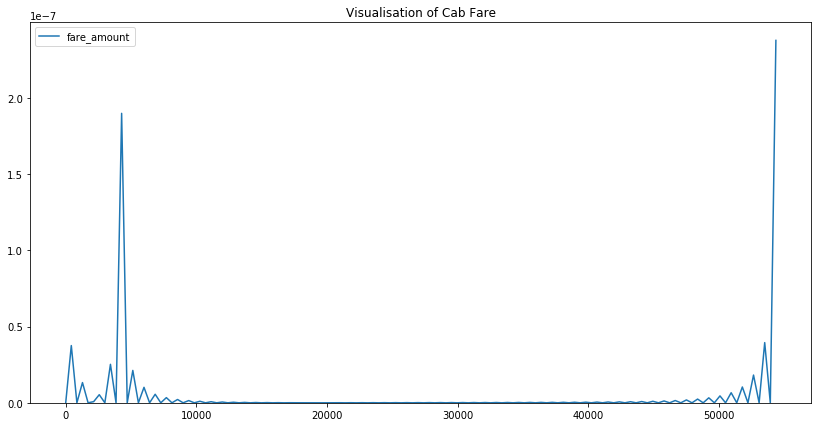

In [23]:
plt.figure(figsize=(14,7))
sns.kdeplot(cab_traindf['fare_amount']).set_title("Visualisation of Cab Fare")
cab_traindf.loc[cab_traindf['fare_amount']<0].shape
cab_traindf["fare_amount"].describe()

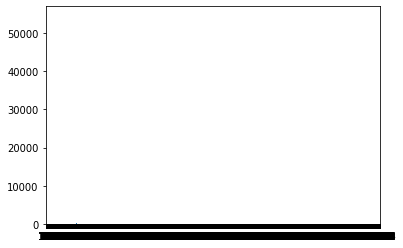

In [33]:
cab_traindf['fare_amount'].plot.bar(x='fare_amount',rot=0)

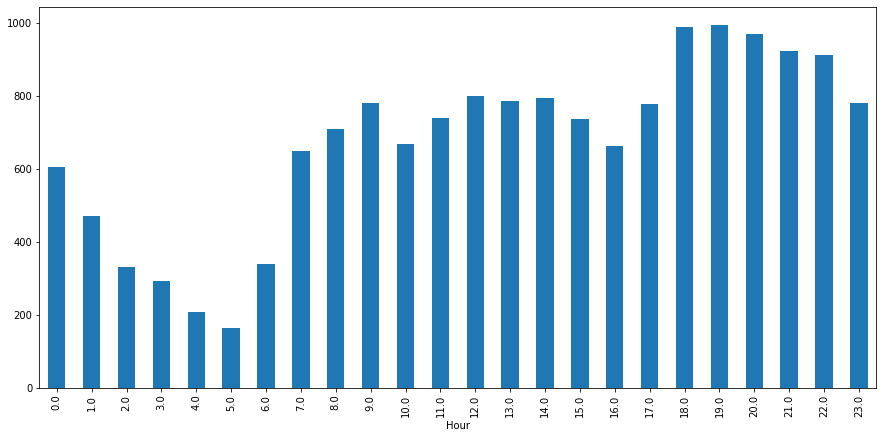

In [429]:
plt.figure(figsize=(15,7))
cab_traindf.groupby(cab_traindf["Hour"])['Hour'].count().plot(kind="bar")
plt.show()

Text(0.5, 1.0, ' Fare Amount vs hour')

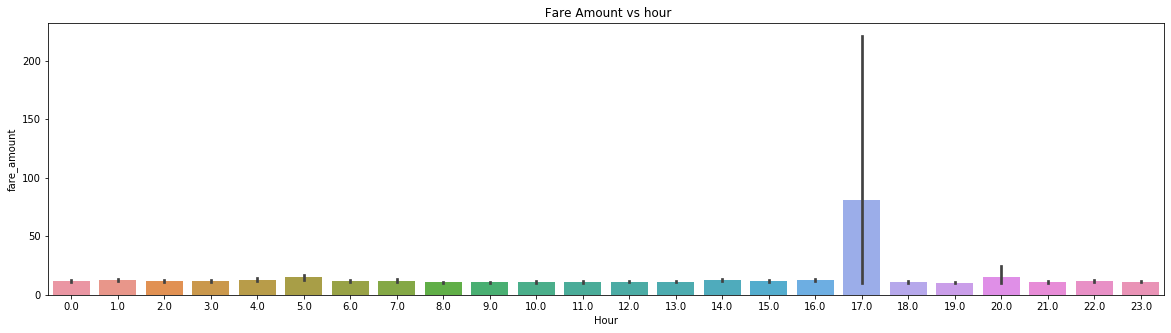

In [430]:
####################### Bar plot of fare amount vs Pickup hour ########
plt.figure(figsize=(20,5))
sns.barplot(x='Hour',y='fare_amount',data=cab_traindf).set_title(" Fare Amount vs hour")
# plt.savefig('farevsyear.png')

Text(0.5, 1.0, ' Fare Amount vs Day')

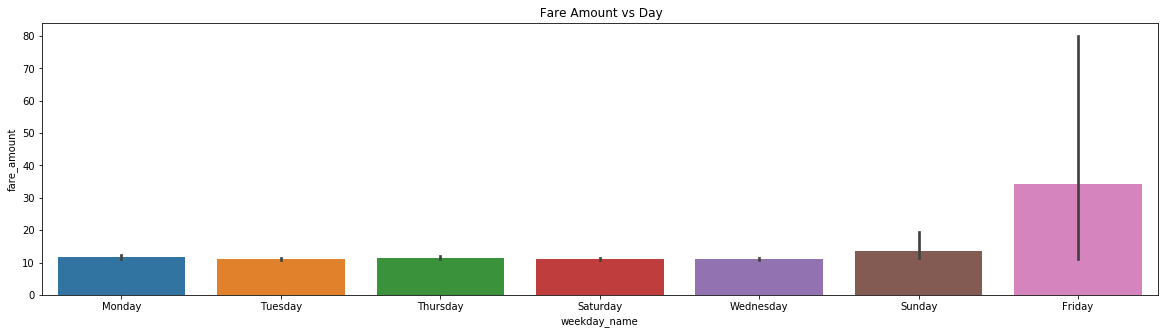

In [431]:
####################### Bar plot of fare amount vs Pickup Day ########
plt.figure(figsize=(20,5))
sns.barplot(x='weekday_name',y='fare_amount',data=cab_traindf).set_title(" Fare Amount vs Day")
# plt.savefig('farevsyear.png')

#### 2. Passenger Count

In [432]:
len(cab_traindf[cab_traindf['passenger_count']>6])

20

In [433]:
cab_traindf[cab_traindf['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Hour,Minute,Second,weekday_name
233,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,236.0,2011.0,7.0,24.0,1.0,14.0,35.0,Sunday
263,4.9,2010-07-12 09:44:33+00:00,-73.983249,40.734655,-73.991278,40.738918,456.0,2010.0,7.0,12.0,9.0,44.0,33.0,Monday
293,6.1,2011-01-18 23:48:00+00:00,-74.006642,40.738927,-74.010828,40.717907,5334.0,2011.0,1.0,18.0,23.0,48.0,0.0,Tuesday
356,8.5,2013-06-18 10:27:05+00:00,-73.992108,40.764203,-73.973000,40.762695,535.0,2013.0,6.0,18.0,10.0,27.0,5.0,Tuesday
386,8.1,2009-08-21 19:35:05+00:00,-73.960853,40.761557,-73.976335,40.748361,354.0,2009.0,8.0,21.0,19.0,35.0,5.0,Friday
413,NaN,2013-09-12 11:32:00+00:00,-73.982060,40.772705,-73.956213,40.771777,55.0,2013.0,9.0,12.0,11.0,32.0,0.0,Thursday
971,10.1,2010-11-21 01:41:00+00:00,-74.004500,40.742143,-73.994330,40.720412,554.0,2010.0,11.0,21.0,1.0,41.0,0.0,Sunday
1007,3.7,2010-12-14 14:46:00+00:00,-73.969157,40.759000,-73.968763,40.764617,53.0,2010.0,12.0,14.0,14.0,46.0,0.0,Tuesday
1043,5.7,2012-08-22 22:08:29+00:00,-73.973573,40.760184,-73.953564,40.767392,35.0,2012.0,8.0,22.0,22.0,8.0,29.0,Wednesday
1107,4.9,2009-08-08 21:50:50+00:00,-73.988977,40.721068,-73.982368,40.732064,345.0,2009.0,8.0,8.0,21.0,50.0,50.0,Saturday


In [434]:
len(cab_traindf[cab_traindf['passenger_count']<1])

58

In [435]:
### passenger count befor removing unacceptable values###
cab_traindf['passenger_count'].shape

(16062,)

- passenger_count variable conatins values which are equal to 0.
- And test data does not contain passenger_count=0 . So if we feature engineer passenger_count of train dataset then it will     create a dummy variable for passenger_count=0 which will be an extra feature compared to test dataset.
- So, we will remove those 0 values.Also, We will remove 20 observation which are above 6 value because a cab cannot hold these
  number of passengers.

In [436]:
###removing unacceptable values###
cab_traindf = cab_traindf.drop(cab_traindf[cab_traindf['passenger_count']>6].index, axis=0)
cab_traindf = cab_traindf.drop(cab_traindf[cab_traindf['passenger_count']<1].index, axis=0)

#### passenger count after removing values###
cab_traindf['passenger_count'].shape

(15984,)

C:\Users\Poo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Poo\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Visualisation of passenger_count')

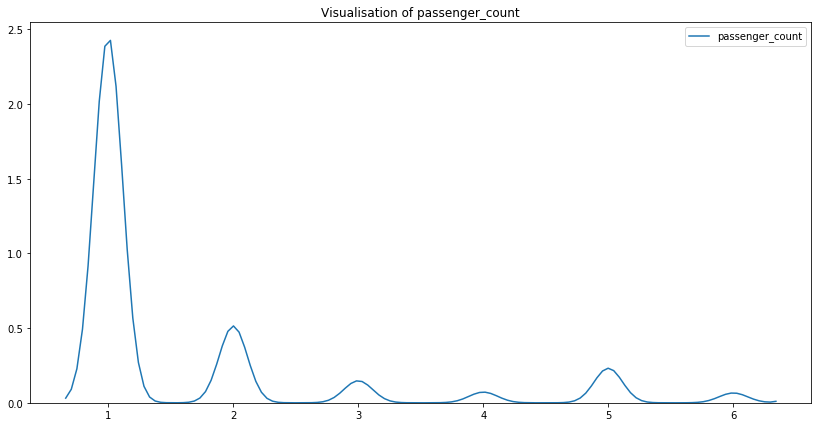

In [437]:
######################## Visualisation of passenger_count ######

plt.figure(figsize=(14,7))
sns.kdeplot(cab_traindf['passenger_count']).set_title("Visualisation of passenger_count")

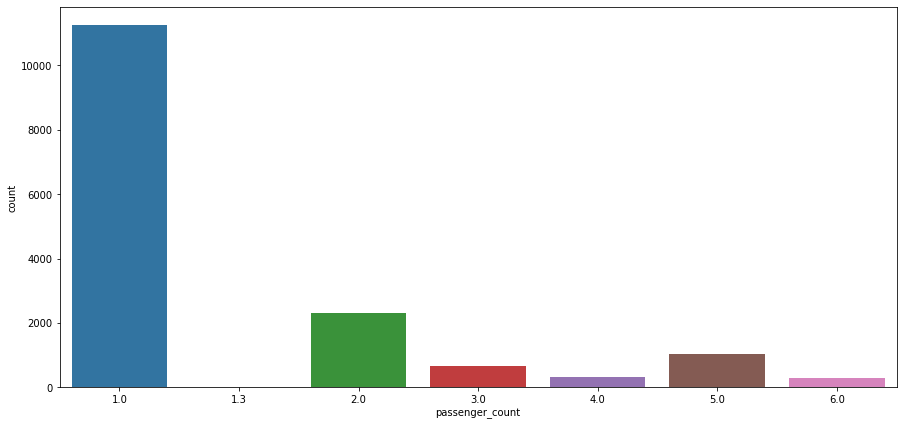

In [438]:
# Count plot on passenger count
plt.figure(figsize=(15,7))
sns.countplot(x="passenger_count", data=cab_traindf)

Text(0.5, 1.0, ' Fare Amount vs passenger count')

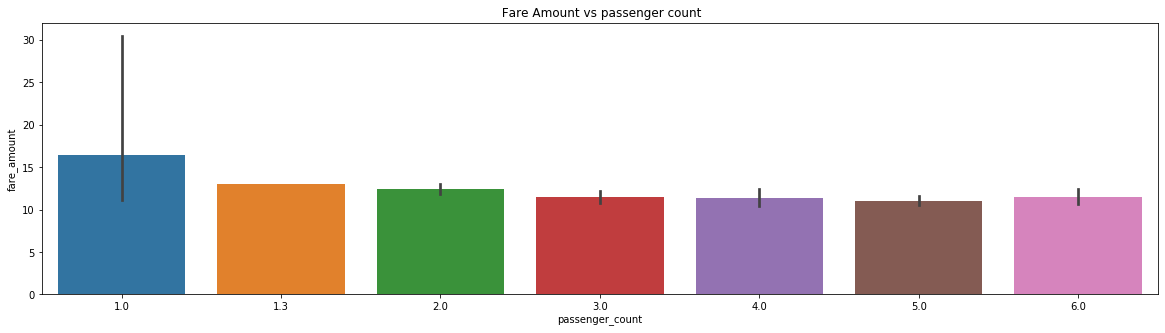

In [439]:
############################## Bar plot of fare amount vs passenger count ####
plt.figure(figsize=(20,5))
sns.barplot(x='passenger_count',y='fare_amount',data=cab_traindf).set_title(" Fare Amount vs passenger count")

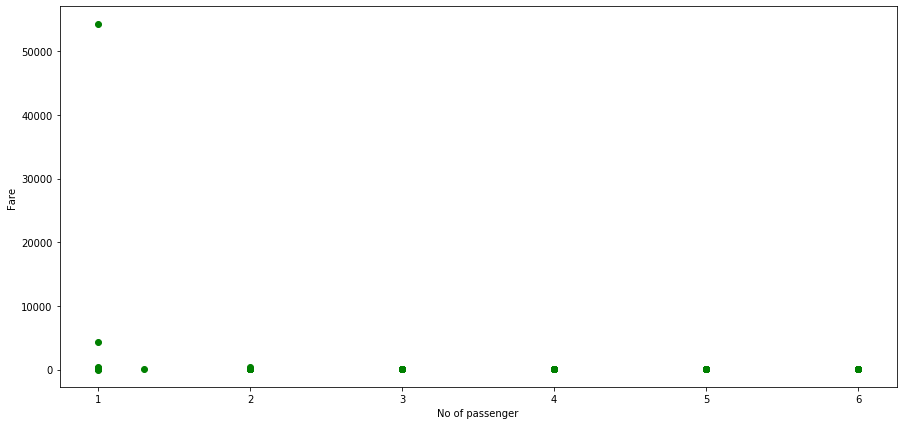

In [440]:
plt.figure(figsize=(15,7))
plt.scatter(x = cab_traindf['passenger_count'],y = cab_traindf['fare_amount'],c = "g")
plt.xlabel('No of passenger')
plt.ylabel('Fare')
plt.show()

#### 3. Pickup lattitude and longitude

In [441]:
###Latitudes range from -90 to 90.Longitudes range from -180 to 180. Removing which does not satisfy these ranges##
print('pickup_longitude above 180={}'.format(sum(cab_traindf['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(cab_traindf['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(cab_traindf['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(cab_traindf['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(cab_traindf['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(cab_traindf['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(cab_traindf['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(cab_traindf['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


- There's only one outlier which is in variable pickup_latitude.So we will remove it with nan.
- Also we will see if there are any values equal to 0.

In [442]:
###pickup_latitude below -90=0##
cab_traindf = cab_traindf.drop(cab_traindf[cab_traindf['pickup_latitude']>90].index, axis=0)

In [443]:
##Also we will see if there are any values equal to 0##
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(cab_traindf[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


- there are values which are equal to 0. we will remove them.

In [444]:
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    cab_traindf = cab_traindf.drop(cab_traindf[cab_traindf[i]==0].index, axis=0)

In [445]:
cab_traindf.shape

(15661, 14)

### Now we have successfully cleared our both datasets. Thus proceeding for further operations:
#### Calculating distance based on the given coordinates :

In [446]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [447]:
cab_traindf['Distance_KM'] = cab_traindf[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [448]:
cab_testdf['Distance_KM'] = cab_testdf[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [449]:
cab_traindf.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Year,Month,Date,Hour,Minute,Second,weekday_name,Distance_KM
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,17.0,26.0,21.0,Monday,1.030764
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,52.0,16.0,Tuesday,8.450134
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,35.0,0.0,Thursday,1.389525
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,30.0,42.0,Saturday,2.799270
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,51.0,0.0,Tuesday,1.999157


In [450]:
cab_traindf['Distance_KM'].sort_values(ascending=False)

5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
9899       97.670590
4487       95.852036
9808       93.925599
7401       92.605848
12349      43.648755
649        39.476975
6308       37.812945
4118       32.602535
7021       29.478280
6677       26.369072
4567       25.735917
8105       24.690884
15023      24.125745
15178      23.814940
14099      23.696200
12433      23.513721
8259       23.445758
4268       23.196680
3216       23.184092
4299       23.168706
12941      23.114168
            ...     
12541       0.000000
10582       0.000000
4559        0.000000
4582        0.000000
10524       0.000000
4240        0.000000
14485       0.000000
1723        0.000000
10485       0.000000
12581       0.000000
1124        0.000000
4653        0.000000
10648       0.000000
15230       0.000000
2346        0.000000
10688       0.000000
4458        0

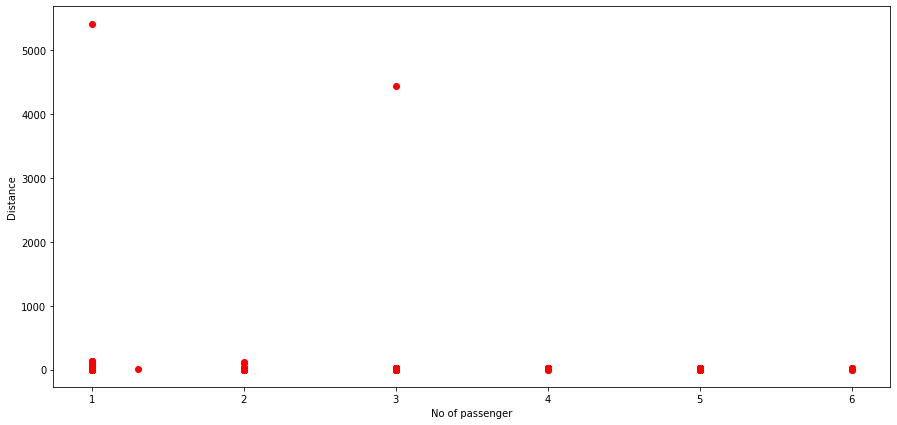

In [451]:
plt.figure(figsize=(15,7))
plt.scatter(x = cab_traindf['passenger_count'],y = cab_traindf['Distance_KM'],c = "r")
plt.xlabel('No of passenger')
plt.ylabel('Distance')
plt.show()

In [ ]:
############################## Bar plot of fare amount vs distance ####
plt.figure(figsize=(20,5))
sns.barplot(x='Distance_KM',y='fare_amount',data=cab_traindf).set_title(" Fare Amount vs Distance")

Text(0.5, 1.0, ' Fare Amount vs Distance')

In [240]:
#cab_traindf.head()

## Missing Value Analysis

In [241]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(cab_traindf.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55
7,Year,1
8,Month,1
9,Date,1


In [242]:
################### MISSING VALUE ANALYSIS ################

#Create dataframe with missing percentage
missing_val = pd.DataFrame(cab_traindf.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(cab_traindf))*100
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

missing_val

,Variables,Missing_percentage
0,passenger_count,0.351191
1,fare_amount,0.140476
2,pickup_datetime,0.006385
3,Year,0.006385
4,Month,0.006385
5,Date,0.006385
6,Hour,0.006385
7,Minute,0.006385
8,Second,0.006385
9,weekday_name,0.006385


1.For Passenger_count:

- Actual value = 1
- Mode = 1
- KNN = 2


In [243]:
###check the original value##
cab_traindf['passenger_count'].loc[1000]

1.0

In [244]:
# Replacing 1.0 with NA
#cab_traindf['passenger_count'].loc[1000] = np.nan
#cab_traindf['passenger_count'].loc[1000]

In [245]:
# Impute with mode##
cab_traindf['passenger_count'].fillna(cab_traindf['passenger_count'].mode()[0]).loc[1000]

1.0

In [ ]:
cab_traindf['passenger_count']=cab_traindf['passenger_count'].fillna(cab_traindf['passenger_count'].median())

We can't use mode method because data will be more biased towards passenger_count=1

In [246]:
#cab_traindf['passenger_count']=cab_traindf['passenger_count'].fillna(2)

In [247]:
#apply knn ###
#columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']
#cab_traindf = pd.DataFrame(KNN(k = 3).fit_transform(cab_traindf), columns = cab_traindf.columns)

2.For fare_amount:

- Actual value = 7.0,
- Mean = 15.117,
- Median = 8.5,
- KNN = 7.4

In [248]:
cab_traindf['passenger_count'].isnull().sum()

0

In [249]:
cab_traindf['passenger_count'].head()

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: passenger_count, dtype: float64

In [250]:
cab_traindf['passenger_count']=cab_traindf['passenger_count'].astype('int')
cab_traindf['passenger_count'].head()

0    1
1    1
2    2
3    1
4    1
Name: passenger_count, dtype: int32

In [251]:
# Choosing a random values to replace it as NA##
a=cab_traindf['fare_amount'].loc[1000]
print('fare_amount at loc-1000:{}'.format(a))
# Replacing 1.0 with NA
cab_traindf['fare_amount'].loc[1000] = np.nan
print('Value after replacing with nan:{}'.format(cab_traindf['fare_amount'].loc[1000]))
# Impute with mean
print('Value if imputed with mean:{}'.format(cab_traindf['fare_amount'].fillna(cab_traindf['fare_amount'].mean()).loc[1000]))
# Impute with median
print('Value if imputed with median:{}'.format(cab_traindf['fare_amount'].fillna(cab_traindf['fare_amount'].median()).loc[1000]))

fare_amount at loc-1000:7.0
Value after replacing with nan:nan
Value if imputed with mean:15.118196060877201
Value if imputed with median:8.5


C:\Users\Poo\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [252]:
#check for knn ##
#columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']
##cab_traindf = pd.DataFrame(KNN(k = 3).fit_transform(cab_traindf), columns = cab_traindf.columns)

In [ ]:
cab_traindf['fare_amount']=cab_traindf['fare_amount'].fillna(cab_traindf['fare_amount'].median())

In [253]:
#cab_traindf['fare_amount']=cab_traindf['fare_amount'].fillna(7.4)


In [254]:
## check for NA value ##
cab_traindf['fare_amount'].isnull().sum()

0

In [255]:
cab_traindf.loc[1000]

fare_amount                                7.4
pickup_datetime      2014-06-15 17:11:00+00:00
pickup_longitude                      -73.9954
pickup_latitude                        40.7597
dropoff_longitude                     -73.9876
dropoff_latitude                       40.7512
passenger_count                              1
Year                                      2014
Month                                        6
Date                                        15
Hour                                        17
Minute                                      11
Second                                       0
weekday_name                            Sunday
Distance_KM                            1.14395
Name: 1000, dtype: object

We will drop 1 row which has missing value for Year, Month,Day,Minute,Hour,second

In [256]:
cab_traindf=cab_traindf.dropna()

In [257]:
##check for NA in the dataset ##
cab_traindf.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Date                 0
Hour                 0
Minute               0
Second               0
weekday_name         0
Distance_KM          0
dtype: int64

In [258]:
cab_traindf.shape

(15660, 15)

## Check for Unique Function

In [259]:
cab_traindf.nunique()

fare_amount            456
pickup_datetime      15615
pickup_longitude     13721
pickup_latitude      14170
dropoff_longitude    13816
dropoff_latitude     14188
passenger_count          6
Year                     7
Month                   12
Date                    31
Hour                    24
Minute                  60
Second                  60
weekday_name             7
Distance_KM          15506
dtype: int64

In [260]:
cab_testdf.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
Month                  12
Date                   31
Day                     7
Hour                   24
Minute                 60
Distance_KM          9830
dtype: int64

In [261]:
drop=['pickup_datetime']
cab_traindf = cab_traindf.drop(drop, axis = 1)
cab_testdf= cab_testdf.drop(drop, axis=1 )

# Outlier Analysis using Boxplot

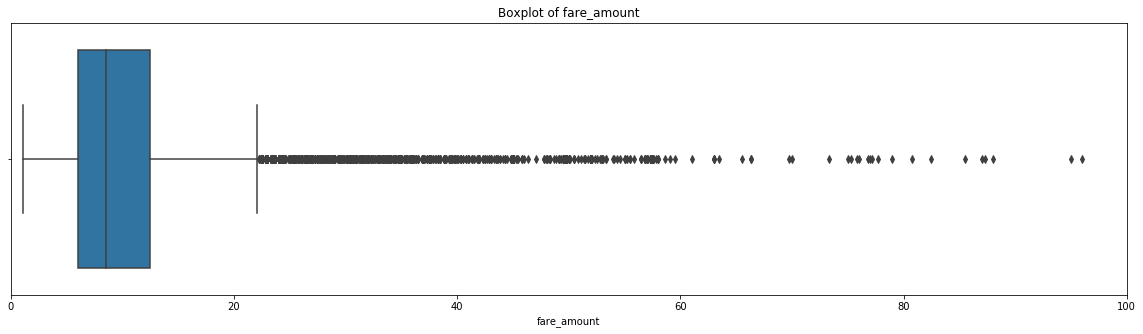

In [262]:
### before removing outliner #####
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=cab_traindf['fare_amount'],data=cab_traindf,orient='h')
plt.title('Boxplot of fare_amount')
# plt.savefig('bp of fare_amount.png')
plt.show()

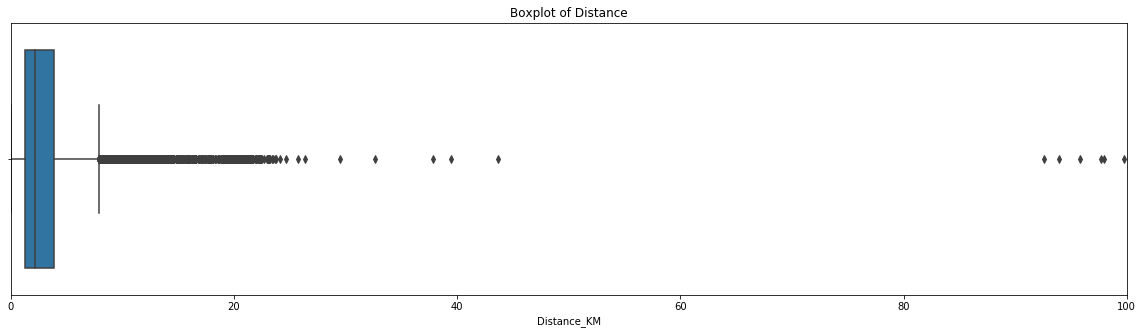

In [263]:
### outliers for distance ##
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=cab_traindf['Distance_KM'],data=cab_traindf,orient='h')
plt.title('Boxplot of Distance')
# plt.savefig('bp of fare_amount.png')
plt.show()

In [264]:
cab_traindf['Distance_KM'].max()

5420.988958578794

# Outlier Treatment
As we can see from the above Boxplots there are outliers in the train dataset.
Reconsider pickup_longitude,etc.
### 1. Distance

In [265]:
sum(cab_traindf['Distance_KM']<7.87)/len(cab_traindf['Distance_KM'])*100

91.38569604086845

In [266]:
cab_traindf= cab_traindf.drop(cab_traindf[cab_traindf['Distance_KM']>91.34].index, axis=0)
cab_traindf.shape
cab_traindf['Distance_KM'].max()

43.64875491470145

### 2. Fare Amount

In [267]:
sum(cab_traindf['fare_amount']<22.25)/len(cab_traindf['fare_amount'])*100
#91.3274
#len(cab_traindf[cab_traindf['fare_amount']>91.33])
#10

91.32741100530453

In [268]:
cab_traindf=cab_traindf.drop(cab_traindf[cab_traindf['fare_amount']>91.33].index, axis=0)

In [269]:
cab_traindf.shape

(15637, 14)

In [270]:
cnames = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']

############################## Box plot method to remove the outliers ########
######################
for i in cnames:
    print(i)
    q75, q25 = np.percentile(cab_traindf.loc[:,i], [75 ,25])
    print("75% ="+ str(q75))
    print("25% ="+ str(q25))
    iqr = q75 - q25
    print("IQR ="+ str(iqr))
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print("Min="+ str(min))
    print("Max="+ str(max))
# To remove the Outliers
cab_traindf = cab_traindf.drop(cab_traindf[cab_traindf.loc[:,i] < min].index)
cab_traindf = cab_traindf.drop(cab_traindf[cab_traindf.loc[:,i] > max].index)

pickup_longitude
75% =-73.968108
25% =-73.99239
IQR =0.02428199999999947
Min=-74.028813
Max=-73.931685
pickup_latitude
75% =40.767802
25% =40.736554999999996
IQR =0.031247000000007574
Min=40.689684499999984
Max=40.814672500000015
dropoff_longitude
75% =-73.965388
25% =-73.99136899999999
IQR =0.025980999999987375
Min=-74.03034049999997
Max=-73.92641650000002
dropoff_latitude
75% =40.768307
25% =40.736297
IQR =0.03200999999999965
Min=40.688282
Max=40.816322


In [271]:
cab_traindf.shape

(14892, 14)

In [272]:
##check the Distance equale to Zero##
len(cab_traindf[cab_traindf['Distance_KM']==0])

134

In [273]:
#A=cab_traindf.drop(cab_traindf[cab_traindf['Distance_KM']==0].index, axis=0)
#A['Distance_KM'].sort_values(ascending=True)
#len(A['Distance_KM'])
#14758

In [274]:
cab_traindf=cab_traindf.drop(cab_traindf[cab_traindf['Distance_KM']==0].index, axis=0)
cab_traindf.shape

(14758, 14)

In [275]:
########################### Continues Variable with Target Variable#########
c_names = ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Distance_KM','passenger_count']


[]

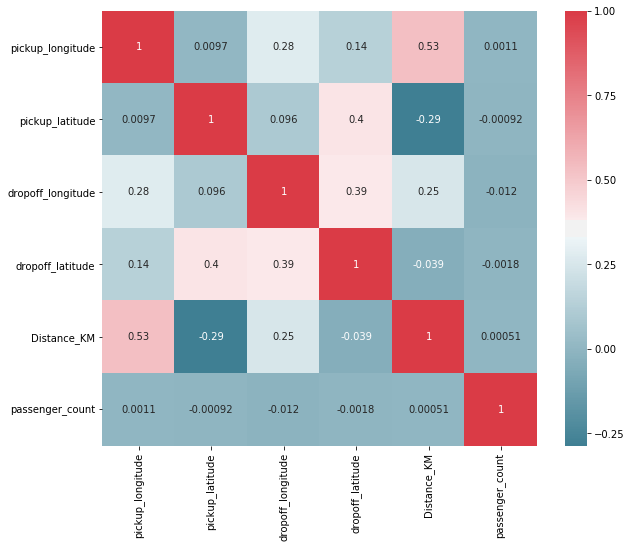

In [276]:
#################### Feature Selection ##########

#Correlation analysis
#Correlation plot
df_corr = cab_traindf.loc[:,c_names]

#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(10, 8))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), annot = True, square=True, ax=ax)
plt.plot()

In [277]:
from scipy.stats import chi2_contingency
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats

In [278]:
########################## CATAGARICAL VARIABLES #############################
cat_names = ['Year','Month','Date','Hour','Minute','Second','passenger_count']

In [279]:
#Here we are using ANOVA test for catagorical attributes
for i in cat_names:
    F, p =  stats.f_oneway(cab_traindf[i], cab_traindf["fare_amount"])
    print("P value for variable "+str(i)+" is "+str(p))
    print("f value for variable "+str(i)+" is "+str(F))

P value for variable Year is 0.0
f value for variable Year is 838612627.6366291
P value for variable Month is 0.0
f value for variable Month is 3457.6279842124372
P value for variable Date is 0.0
f value for variable Date is 2694.311656597273
P value for variable Hour is 1.0887656972838795e-265
f value for variable Hour is 1237.9243659903896
P value for variable Minute is 0.0
f value for variable Minute is 14776.289046077203
P value for variable Second is 5.65032172064946e-225
f value for variable Second is 1043.3492041725774
P value for variable passenger_count is 0.0
f value for variable passenger_count is 17065.966901462358


In [280]:
# drop the variables those who are highly correlated
cab_traindf = cab_traindf.drop(['pickup_latitude','pickup_longitude','dropoff_longitude','dropoff_latitude'], axis=1)

In [281]:
cab_traindf.shape

(14758, 10)

In [282]:
cab_traindf.to_csv("traindf_Visualisation.csv",index=False)

# Feature Scaling

fare_amount


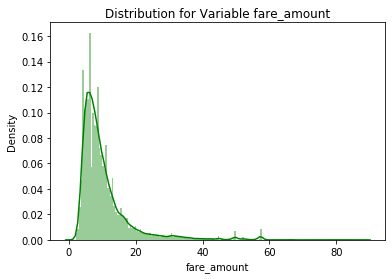

Distance_KM


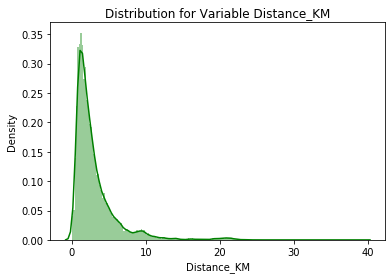

In [283]:
#Normality check of training data is uniformly distributed or not##

for i in ['fare_amount', 'Distance_KM']:
    print(i)
    sns.distplot(cab_traindf[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

Distance_KM


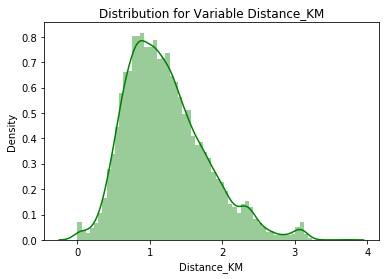

fare_amount


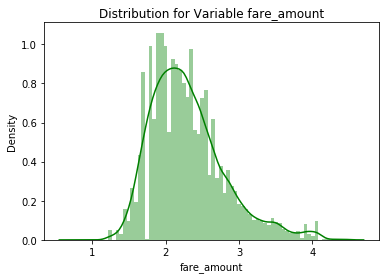

In [284]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
cab_traindf['Distance_KM'] = np.log1p(cab_traindf['Distance_KM'])
cab_traindf['fare_amount'] = np.log1p(cab_traindf['fare_amount'])



#Normality Re-check to check data is uniformly distributed or not after log transformartion

for i in  ['Distance_KM','fare_amount']:
    print(i)
    sns.distplot(cab_traindf[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

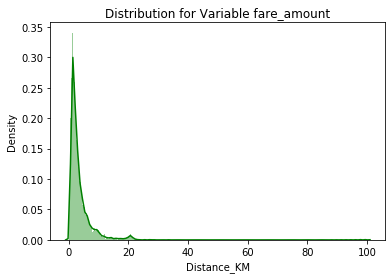

In [285]:
#Normality check for test data is uniformly distributed or not-

sns.distplot(cab_testdf['Distance_KM'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

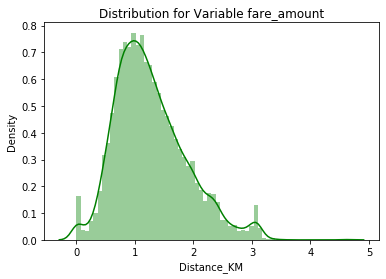

In [286]:
#since skewness of distance variable is high, apply log transform to reduce the skewness-
cab_testdf['Distance_KM'] = np.log1p(cab_testdf['Distance_KM'])

#rechecking the distribution for distance
sns.distplot(cab_testdf['Distance_KM'],bins='auto',color='green')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [287]:
cab_traindf.dtypes

fare_amount        float64
passenger_count      int32
Year               float64
Month              float64
Date               float64
Hour               float64
Minute             float64
Second             float64
weekday_name        object
Distance_KM        float64
dtype: object

In [288]:
cab_traindf["weekday_name"] = pd.to_numeric(cab_traindf["weekday_name"],errors = "coerce")  #Using errors=’coerce’. It will replace all non-numeric values with NaN.

In [289]:
cab_traindf.dtypes

fare_amount        float64
passenger_count      int32
Year               float64
Month              float64
Date               float64
Hour               float64
Minute             float64
Second             float64
weekday_name       float64
Distance_KM        float64
dtype: object

# Applying ML ALgorithms:
### Splitting train into train and validation subsets

In [290]:
X = cab_traindf.drop(['fare_amount','weekday_name'],axis=1).values
y = cab_traindf['fare_amount'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)
print(cab_traindf.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(14758, 10) (11068, 8) (3690, 8) (11068,) (3690,)


In [291]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression #ML algorithm
from sklearn.model_selection import train_test_split #splitting dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
from sklearn import metrics

# 1.Multiple Linear Regression

In [292]:
# Building model on top of training dataset
fit_LR = LinearRegression().fit(X_train , y_train)

In [293]:
#prediction on train data
pred_train_LR = fit_LR.predict(X_train)
#prediction on test data
pred_test_LR = fit_LR.predict(X_test)

In [295]:
## R^2 calculation for train data
r2_train_LR=r2_score(y_train, pred_train_LR)
## R^2 calculation for train data
r2_test_LR=r2_score(y_test, pred_test_LR)

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

print('<<<------------------- Training Data Score --------------------->')
print("r^2 For Training data = "+str(r2_train_LR))
print("RMSE For Training data = "+str(RMSE_train_LR))
print('MAPE For Training data:{}'.format(np.mean(np.abs((y_train -pred_train_LR ) / pred_train_LR))*100))
print('MSE For Training data:', metrics.mean_squared_error(y_train, pred_train_LR))
print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y_train, pred_train_LR))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

print('<<<------------------- Test Data Score --------------------->')
print("r^2 For Test data = "+str(r2_test_LR))
print("RMSE For Test data = "+str(RMSE_test_LR))
print('MAPE For Test data:{}'.format(np.mean(np.abs((y_test -pred_test_LR ) / pred_test_LR))*100))
print('MSE For Test data:', metrics.mean_squared_error(y_test, pred_test_LR))
print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y_test, pred_test_LR))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

<<<------------------- Training Data Score --------------------->
r^2 For Training data = 0.7797498192061617
RMSE For Training data = 0.23749035563979415
MAPE For Training data:7.459176119320865
MSE For Training data: 0.05640166902191591
Adjusted r square:0.7795904918305987
<<<------------------- Test Data Score --------------------->
r^2 For Test data = 0.7207927037652638
RMSE For Test data = 0.26806663907573625
MAPE For Test data:7.926151367337418
MSE For Test data: 0.07185972298536103
Adjusted r square:0.7201858962754845


# 2.Decision Tree

In [296]:
# Building model on top of training dataset
fit_DT = DecisionTreeRegressor(max_depth = 2).fit(X_train,y_train)

#prediction on train data
pred_train_DT = fit_DT.predict(X_train)
#prediction on test data
pred_test_DT = fit_DT.predict(X_test)

## R^2 calculation for train data
r2_train_DT=r2_score(y_train, pred_train_DT)
## R^2 calculation for test data
r2_test_DT=r2_score(y_test, pred_test_DT)

##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))
##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

print('<<<------------------- Training Data Score --------------------->')
print("r^2 For Training data = "+str(r2_train_DT))
print("RMSE For Training data = "+str(RMSE_train_DT))
print('MAPE For Training data:{}'.format(np.mean(np.abs((y_train -pred_train_DT ) / pred_train_DT))*100))
print('MSE For Training data:', metrics.mean_squared_error(y_train, pred_train_DT))
print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y_train, pred_train_DT))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

print('<<<------------------- Test Data Score --------------------->')
print("r^2 For Test data = "+str(r2_test_DT))
print("RMSE For Test data = "+str(RMSE_test_DT))
print('MAPE For Test data:{}'.format(np.mean(np.abs((y_test -pred_test_DT ) / pred_test_DT))*100))
print('MSE For Test data:', metrics.mean_squared_error(y_test, pred_test_DT))
print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y_test, pred_test_DT))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

<<<------------------- Training Data Score --------------------->
r^2 For Training data = 0.7035867698239004
RMSE For Training data = 0.2755095345895867
MAPE For Training data:9.067909709990467
MSE For Training data: 0.07590550364977068
Adjusted r square:0.7033723466535045
<<<------------------- Test Data Score --------------------->
r^2 For Test data = 0.6687100459214004
RMSE For Test data = 0.29200045028228483
MAPE For Test data:9.423402312400869
MSE For Test data: 0.0852642629650571
Adjusted r square:0.6679900460212024


# 3.Random Forest

In [297]:
fit_RF = RandomForestRegressor(n_estimators = 200).fit(X_train,y_train)

#prediction on train data
pred_train_RF = fit_RF.predict(X_train)
#prediction on test data
pred_test_RF = fit_RF.predict(X_test)

##Calculate r2 on train
r2_train_RF=r2_score(y_train, pred_train_RF)
##Calculate r2 on test
r2_test_RF=r2_score(y_test, pred_test_RF)

##calculating RMSE for train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))
##calculating RMSE for test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

print('<<<------------------- Training Data Score --------------------->')
print("r^2 For Training data = "+str(r2_train_RF))
print("RMSE For Training data = "+str(RMSE_train_RF))
print('MAPE For Training data:{}'.format(np.mean(np.abs((y_train -pred_train_RF ) / pred_train_RF))*100))
print('MSE For Training data:', metrics.mean_squared_error(y_train, pred_train_RF))
print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y_train, pred_train_RF))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

print('<<<------------------- Test Data Score --------------------->')
print("r^2 For Test data = "+str(r2_test_RF))
print("RMSE For Test data = "+str(RMSE_test_RF))
print('MAPE For Test data:{}'.format(np.mean(np.abs((y_test -pred_test_RF ) / pred_test_RF))*100))
print('MSE For Test data:', metrics.mean_squared_error(y_test, pred_test_RF))
print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y_test, pred_test_RF))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

<<<------------------- Training Data Score --------------------->
r^2 For Training data = 0.9699117038833918
RMSE For Training data = 0.08777819342921722
MAPE For Training data:2.716318475727498
MSE For Training data: 0.007705011241697073
Adjusted r square:0.9698899382292699
<<<------------------- Test Data Score --------------------->
r^2 For Test data = 0.7463180307738687
RMSE For Test data = 0.25551958177175194
MAPE For Test data:7.608353410688369
MSE For Test data: 0.06529025666881101
Adjusted r square:0.7457666980507476


# 4.Gradient Boosting

In [298]:
fit_GB = GradientBoostingRegressor().fit(X_train, y_train)

#prediction on train data
pred_train_GB = fit_GB.predict(X_train)
#prediction on test data
pred_test_GB = fit_GB.predict(X_test)

#calculate R^2 for test data
r2_test_GB=r2_score(y_test, pred_test_GB)
#calculate R^2 for train data
r2_train_GB=r2_score(y_train, pred_train_GB)

##calculating RMSE for train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))
##calculating RMSE for test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

print('<<<------------------- Training Data Score --------------------->')
print("r^2 For Training data = "+str(r2_train_GB))
print("RMSE For Training data = "+str(RMSE_train_GB))
print('MAPE For Training data:{}'.format(np.mean(np.abs((y_train -pred_train_GB ) / pred_train_GB))*100))
print('MSE For Training data:', metrics.mean_squared_error(y_train, pred_train_GB))
print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y_train, pred_train_GB))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

print('<<<------------------- Test Data Score --------------------->')
print("r^2 For Test data = "+str(r2_test_GB))
print("RMSE For Test data = "+str(RMSE_test_GB))
print('MAPE For Test data:{}'.format(np.mean(np.abs((y_test -pred_test_GB ) / pred_test_GB))*100))
print('MSE For Test data:', metrics.mean_squared_error(y_test, pred_test_GB))
print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y_test, pred_test_GB))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

<<<------------------- Training Data Score --------------------->
r^2 For Training data = 0.823665769599862
RMSE For Training data = 0.21249863976484565
MAPE For Training data:6.748072188942926
MSE For Training data: 0.045155671901909646
Adjusted r square:0.8235382107027465
<<<------------------- Test Data Score --------------------->
r^2 For Test data = 0.7664922230045149
RMSE For Test data = 0.2451489641326959
MAPE For Test data:7.239623326210609
MSE For Test data: 0.060098014615333824
Adjusted r square:0.7659847353066165


### Optimizing the results with parameters tuning

In [299]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor(random_state = 42)

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [300]:
gb = GradientBoostingRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(gb.get_params())

Parameters currently in use:

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


# 5. Random Hyperparameter Grid
### 5.1 Random Search CV on Random Forest Model

In [301]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [302]:
##Random Search CV on Random Forest Model

RRF = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_rf = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_rf = RandomizedSearchCV(rf, param_distributions = rand_rf, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train,y_train)
predictions_rf = randomcv_rf.predict(X_test)

view_best_params_rf = randomcv_rf.best_params_

best_model = randomcv_rf.best_estimator_

predictions_rf = best_model.predict(X_test)

#R^2
rf_r2 = r2_score(y_test, predictions_rf)
#Calculating RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test,predictions_rf))


print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_rf)
print('R-squared = {:0.2}.'.format(rf_r2))
print('RMSE = ', rf_rmse)


Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.76.
RMSE =  0.25040157476443803


### 5.2 Random Search CV on gradient boosting model

In [303]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator,
               'max_depth': depth}

randomcv_gb = RandomizedSearchCV(gb, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train,y_train)
predictions_gb = randomcv_gb.predict(X_test)

view_best_params_gb = randomcv_gb.best_params_

best_model = randomcv_gb.best_estimator_

predictions_gb = best_model.predict(X_test)

#R^2
gb_r2 = r2_score(y_test, predictions_gb)
#Calculating RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test,predictions_gb))

print('Random Search CV Gradient Boosting Model Performance:')
print('Best Parameters = ',view_best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

Random Search CV Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.72.
RMSE =  0.2700283709908433


### 5.3 Grid Search CV for random Forest model

In [304]:
from sklearn.model_selection import GridSearchCV
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF = gridcv_rf.predict(X_test)

#R^2
GRF_r2 = r2_score(y_test, predictions_GRF)
#Calculating RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test,predictions_GRF))

print('Grid Search CV Random Forest Regressor Model Performance:')
print('Best Parameters = ',view_best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

Grid Search CV Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 7, 'n_estimators': 19}
R-squared = 0.76.
RMSE =  0.24931317574158954


### 5.4 Grid Search CV for gradinet boosting

In [305]:
gb = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gb, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)
view_best_params_Ggb = gridcv_gb.best_params_

#Apply model on test data
predictions_Ggb = gridcv_gb.predict(X_test)

#R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)
#Calculating RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test,predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',view_best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.75.
RMSE =  0.25431719887268023


In [308]:
cab_testdf.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,Distance_KM
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,1.200946
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,1.231205
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.481579
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.085538
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,1.854312


In [309]:
new2= cab_testdf
new2 = new2.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'], axis=1)
new2.head()

,passenger_count,year,Month,Date,Day,Hour,Minute,Distance_KM
0,1,2015,1,27,1,13,8,1.200946
1,1,2015,1,27,1,13,8,1.231205
2,1,2011,10,8,5,11,53,0.481579
3,1,2012,12,1,5,21,12,1.085538
4,1,2012,12,1,5,21,12,1.854312


In [310]:
regr = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator,
               'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(regr, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)
view_best_params_GRF = gridcv_rf.best_params_

#Apply model on test data
predictions_GRF_test_Df = gridcv_rf.predict(new2)

In [311]:
new2['Grib_Predicted_2'] = predictions_GRF_test_Df

In [312]:
new2.head()

,passenger_count,year,Month,Date,Day,Hour,Minute,Distance_KM,Grib_Predicted_2
0,1,2015,1,27,1,13,8,1.200946,2.309283
1,1,2015,1,27,1,13,8,1.231205,2.345339
2,1,2011,10,8,5,11,53,0.481579,1.697727
3,1,2012,12,1,5,21,12,1.085538,2.184233
4,1,2012,12,1,5,21,12,1.854312,2.728517


In [313]:
new2.to_csv("Grib_test_2.csv")